In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-flops-lufact)

We'll test the conclusion of $O(n^3)$ flops experimentally, using the built-in `lu` function instead of the purely instructive `lufact`.
```{tip}
:class: dropdown
The first time a function is invoked, there may be significant time needed to compile it in memory. Thus, when timing a function, run it at least once before beginning the timing.
```

In [2]:
lu(randn(3, 3));   # throwaway to force compilation

n = 400:400:4000
t = []
for n in n
    A = randn(n, n)  
    time = @elapsed for j in 1:12; lu(A); end
    push!(t, time)
end

We plot the timings on a log-log graph and compare it to $O(n^3)$. The result could vary significantly from machine to machine, but in theory the data should start to parallel the line as $n\to\infty$.

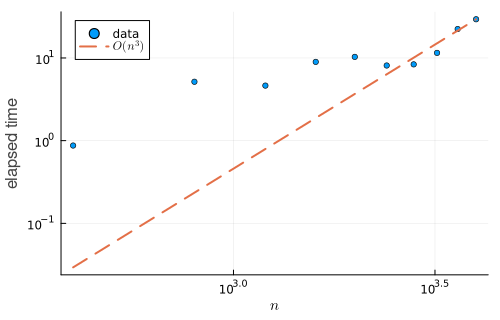

In [3]:
scatter(n, t, label="data", legend=:topleft,
    xaxis=(:log10, L"n"), yaxis=(:log10, "elapsed time"))
plot!(n, t[end ]* (n/n[end]).^3, l=:dash, label=L"O(n^3)")